In [21]:
import os
import numpy as np

import sklearn.model_selection as ms
import sklearn.metrics as skmetrics

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [22]:
Y_train_1hot = np.loadtxt('extracted/Y_train.txt')
Y_test_1hot = np.loadtxt('extracted/Y_test.txt')
print Y_train_1hot.shape, Y_test_1hot.shape

(400, 5) (100, 5)


In [23]:
Y_train = np.where(Y_train_1hot==1)[1]
Y_test = np.where(Y_test_1hot==1)[1]
print Y_train.shape, Y_test.shape

(400,) (100,)


**First** we will use the flattened matrices as feature and try different classification methods

In [24]:
X_flatten_train = np.load('extracted/X_train.npy').reshape(Y_train.shape[0],-1)
X_flatten_test = np.load('extracted/X_test.npy').reshape(Y_test.shape[0],-1)
print X_flatten_train.shape, X_flatten_test.shape

(400, 25800) (100, 25800)


## PCA reduced features

In [9]:
pca_conv = PCA(50)
pca_conv.fit(X_flatten_train)
train_pca = pca_conv.transform(X_flatten_train)
test_pca = pca_conv.transform(X_flatten_test)
print train_pca.shape, test_pca.shape

(400, 50) (100, 50)


In [10]:
clf = svm.SVC(gamma='scale').fit(train_pca, Y_train)
Y_pred = clf.predict(test_pca)
error = sum([1 for i in range(len(Y_test)) if Y_test[i] != Y_pred[i]])
train_error = clf.score(train_pca, Y_train)
test_error = clf.score(test_pca, Y_test)

print '\t# of Misclassification: %s' % str(error)
print '\tTrain accuracy: %s' % str(train_error)
print '\tTest accuracy: %s' % str(test_error)

	# of Misclassification: 79
	Train accuracy: 1.0
	Test accuracy: 0.21


In [14]:
lr = LogisticRegression(random_state=0, solver='newton-cg').fit(train_pca, Y_train)
Y_pred = lr.predict(test_pca)
Y_train_pred = lr.predict(train_pca)
error = sum([1 for i in range(len(Y_test)) if Y_test[i] != Y_pred[i]])
train_error = lr.score(train_pca, Y_train)
test_error = lr.score(test_pca, Y_test)

# train_error = skmetrics.precision_score(train_pca, Y_train_pred, average='micro') 
# test_error = skmetrics.precision_score(test_pca, Y_pred, average='micro') 

print '\t# of Misclassification: %s' % str(error)
print '\tTrain accuracy: %s' % str(train_error)
print '\tTest accuracy: %s' % str(test_error)

	# of Misclassification: 19
	Train accuracy: 0.925
	Test accuracy: 0.81


In [15]:
X_train = train_pca
X_test = test_pca

gda = LinearDiscriminantAnalysis().fit(X_train, Y_train)
Y_pred = gda.predict(X_test)
train_error = gda.score(X_train, Y_train)
test_error = gda.score(X_test, Y_test)

print '\tTrain accuracy: %s' % str(train_error)
print '\tTest accuracy: %s' % str(test_error)

	Train accuracy: 0.84
	Test accuracy: 0.79


In [16]:
X_train = train_pca
X_test = test_pca

clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
train_error = clf.score(X_train, Y_train)
test_error = clf.score(X_test, Y_test)

print '\tTrain accuracy: %s' % str(train_error)
print '\tTest accuracy: %s' % str(test_error)

	Train accuracy: 1.0
	Test accuracy: 0.77


## Using SVM on the raw input

In [5]:
print 'Training SVM for flattened raw matrices ...'
clf = svm.SVC(gamma='scale').fit(X_flatten_train, Y_train)
Y_pred = clf.predict(X_flatten_test)
error = sum([1 for i in range(len(Y_test)) if Y_test[i] != Y_pred[i]])
train_error = clf.score(X_flatten_train, Y_train)
test_error = clf.score(X_flatten_test, Y_test)

print '\t# of Misclassification: %s' % str(error)
print '\tTrain accuracy: %s' % str(train_error)
print '\tTest accuracy: %s' % str(test_error)

Training SVM for flattened raw matrices ...
	# of Misclassification: 72
	Train accuracy: 1.0
	Test accuracy: 0.28


## Using SVM on a hidden layers

In [25]:
print 'Training SVM for conv_1 layers ...'

mat_path = 'extracted'
name = 'conv_1'

X_train_hidden1 = np.loadtxt(os.path.join(mat_path, name+'_train.txt'))
X_test_hidden1 = np.loadtxt(os.path.join(mat_path, name+'_test.txt'))
print X_train_hidden1.shape

clf = svm.SVC(gamma='scale').fit(X_train_hidden1, Y_train)
Y_pred = clf.predict(X_test_hidden1)
error = sum([1 for i in range(len(Y_test)) if Y_test[i] != Y_pred[i]])
train_error = clf.score(X_train_hidden1, Y_train)
test_error = clf.score(X_test_hidden1, Y_test)

print '\t# of Misclassification: %s' % str(error)
print '\tTrain accuracy: %s' % str(train_error)
print '\tTest accuracy: %s' % str(test_error)

Training SVM for conv_1 layers ...
(400, 320)
	# of Misclassification: 18
	Train accuracy: 0.94
	Test accuracy: 0.82


In [26]:
print 'Training SVM for conv_2 ...'

mat_path = 'extracted'
name = 'conv_2'

X_train_hidden2 = np.loadtxt(os.path.join(mat_path, name+'_train.txt'))
X_test_hidden2 = np.loadtxt(os.path.join(mat_path, name+'_test.txt'))
print X_train_hidden2.shape

clf = svm.SVC(gamma='scale').fit(X_train_hidden2, Y_train)
Y_pred = clf.predict(X_test_hidden2)
error = sum([1 for i in range(len(Y_test)) if Y_test[i] != Y_pred[i]])
train_error = clf.score(X_train_hidden2, Y_train)
test_error = clf.score(X_test_hidden2, Y_test)

print '\t# of Misclassification: %s' % str(error)
print '\tTrain accuracy: %s' % str(train_error)
print '\tTest accuracy: %s' % str(test_error)

Training SVM for conv_2 ...
(400, 48)
	# of Misclassification: 15
	Train accuracy: 0.95
	Test accuracy: 0.85


## Using Logistic Regression on raw input

In [27]:
print 'Training LR for flattened raw matrices ...' 

lr = LogisticRegression(random_state=0, solver='newton-cg').fit(X_flatten_train, Y_train)
Y_pred = lr.predict(X_flatten_test)
Y_train_pred = lr.predict(X_flatten_train)
error = sum([1 for i in range(len(Y_test)) if Y_test[i] != Y_pred[i]])

# train_error = lr.score(X_flatten_train, Y_train)
# test_error = lr.score(X_flatten_test, Y_test)

train_error = skmetrics.precision_score(Y_train, Y_train_pred, average='micro') 
test_error = skmetrics.precision_score(Y_test, Y_pred, average='micro') 

print '\t# of Misclassification: %s' % str(error)
print '\tTrain accuracy: %s' % str(train_error)
print '\tTest accuracy: %s' % str(test_error)

Training LR for flattened raw matrices ...
	# of Misclassification: 23
	Train accuracy: 1.0
	Test accuracy: 0.77


## Using Logistic Regression on hidden layers

In [30]:
print 'Training LR for hidden layer 1 ...' 

lr = LogisticRegression(random_state=0, solver='newton-cg').fit(X_train_hidden1, Y_train)
Y_pred = lr.predict(X_test_hidden1)
Y_train_pred = lr.predict(X_train_hidden1)
error = sum([1 for i in range(len(Y_test)) if Y_test[i] != Y_pred[i]])

train_error = skmetrics.precision_score(Y_train, Y_train_pred, average='micro') 
test_error = skmetrics.precision_score(Y_test, Y_pred, average='micro') 


print '\t# of Misclassification: %s' % str(error)
print '\tTrain accuracy: %s' % str(train_error)
print '\tTest accuracy: %s' % str(test_error)

Training LR for hidden layer 1 ...
	# of Misclassification: 13
	Train accuracy: 0.99
	Test accuracy: 0.87


In [29]:
print 'Training LR for hidden layer 2 ...' 

lr = LogisticRegression(random_state=0, solver='newton-cg').fit(X_train_hidden2, Y_train)
Y_pred = lr.predict(X_test_hidden2)
Y_train_pred = lr.predict(X_train_hidden2)
error = sum([1 for i in range(len(Y_test)) if Y_test[i] != Y_pred[i]])

train_error = skmetrics.precision_score(Y_train, Y_train_pred, average='micro') 
test_error = skmetrics.precision_score(Y_test, Y_pred, average='micro') 


print '\t# of Misclassification: %s' % str(error)
print '\tTrain accuracy: %s' % str(train_error)
print '\tTest accuracy: %s' % str(test_error)

Training LR for hidden layer 2 ...
	# of Misclassification: 16
	Train accuracy: 0.9525
	Test accuracy: 0.84


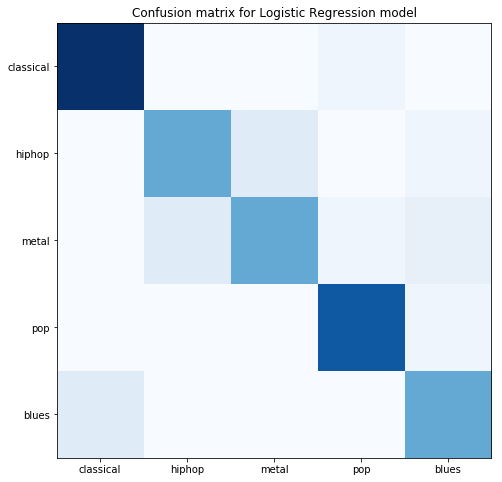

In [17]:
plt.figure(figsize=(8,8))
cm = confusion_matrix(Y_test, Y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(list(range(5)), ['classical', 'hiphop', 'metal', 'pop', 'blues'])
plt.yticks(list(range(5)), ['classical', 'hiphop', 'metal', 'pop', 'blues'])
# plt.tick_params(labelsize=20)
plt.title('Confusion matrix for Logistic Regression model')
plt.savefig('plots/log_confusion.png')

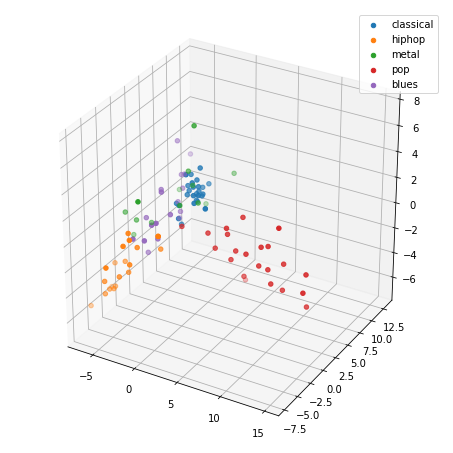

In [39]:
pca_conv = PCA(3)
pca_conv.fit(X_train_hidden1.reshape(X_train_hidden1.shape[0], -1))
test_pca = pca_conv.transform(X_test_hidden1.reshape(X_test_hidden1.shape[0], -1))
colors = Y_pred
colors_txt = np.empty(len(colors), dtype=str)
colors_txt[colors==0] = 'red'
colors_txt[colors==1] = 'blue'
colors_txt[colors==2] = 'green'
colors_txt[colors==3] = 'yellow'
colors_txt[colors==4] = 'black'
genres = ['classical', 'hiphop', 'metal', 'pop', 'blues']
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
for i in range(5):
    ax.scatter(test_pca[colors==i, 0].ravel(), test_pca[colors==i,1].ravel(), test_pca[colors==i,2].ravel(),
                label=genres[i])
ax.legend()
plt.savefig('plots/log_pred_pca.png')
plt.show()

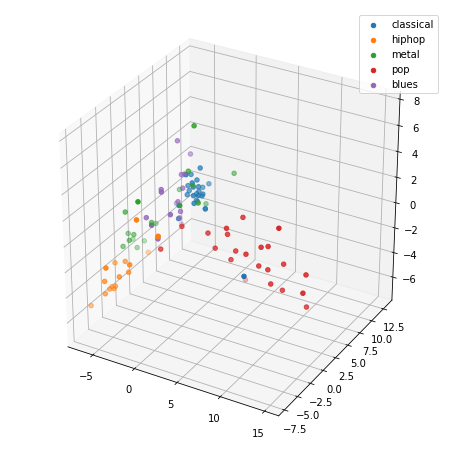

In [38]:
pca_conv = PCA(3)
pca_conv.fit(X_train_hidden1.reshape(X_train_hidden1.shape[0], -1))
test_pca = pca_conv.transform(X_test_hidden1.reshape(X_test_hidden1.shape[0], -1))
colors = Y_test
colors_txt = np.empty(len(colors), dtype=str)
colors_txt[colors==0] = 'red'
colors_txt[colors==1] = 'blue'
colors_txt[colors==2] = 'green'
colors_txt[colors==3] = 'yellow'
colors_txt[colors==4] = 'black'
genres = ['classical', 'hiphop', 'metal', 'pop', 'blues']
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
for i in range(5):
    ax.scatter(test_pca[colors==i, 0].ravel(), test_pca[colors==i,1].ravel(), test_pca[colors==i,2].ravel(),
                label=genres[i])
ax.legend()
plt.savefig('plots/log_true_pca.png')
plt.show()

## Using GDA on raw input

In [12]:
X_train = X_flatten_train
X_test = X_flatten_test

gda = LinearDiscriminantAnalysis().fit(X_train, Y_train)
Y_pred = gda.predict(X_test)
train_error = gda.score(X_train, Y_train)
test_error = gda.score(X_test, Y_test)

print '\tTrain accuracy: %s' % str(train_error)
print '\tTest accuracy: %s' % str(test_error)

	Train accuracy: 0.8875
	Test accuracy: 0.77


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## Using GDA on hidden layers


In [13]:
fix = ['conv_1', 'conv_2']
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
for name in fix:
    X_train = np.loadtxt(os.path.join(mat_path, name+'_train.txt'))
    X_test = np.loadtxt(os.path.join(mat_path, name+'_test.txt'))
    
    print 'Training GDA for %s ...' % name
    gda = LinearDiscriminantAnalysis().fit(X_train, Y_train)
    Y_pred = gda.predict(X_test)
    train_error = gda.score(X_train, Y_train)
    test_error = gda.score(X_test, Y_test)

    print '\tTrain accuracy: %s' % str(train_error)
    print '\tTest accuracy: %s' % str(test_error)

Training GDA for conv_1 ...
	Train accuracy: 0.94
	Test accuracy: 0.8
Training GDA for conv_2 ...
	Train accuracy: 1.0
	Test accuracy: 0.61


## Using Random Forests for raw input

In [14]:
X_train = X_flatten_train
X_test = X_flatten_test
clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
train_error = clf.score(X_train, Y_train)
test_error = clf.score(X_test, Y_test)

print '\tTrain accuracy: %s' % str(train_error)
print '\tTest accuracy: %s' % str(test_error)

	Train accuracy: 1.0
	Test accuracy: 0.78


## Using Random Forests for hidden layers

In [15]:
X_train = X_train_hidden1
X_test = X_test_hidden1
clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
train_error = clf.score(X_train, Y_train)
test_error = clf.score(X_test, Y_test)

print '\tTrain accuracy: %s' % str(train_error)
print '\tTest accuracy: %s' % str(test_error)


	Train accuracy: 1.0
	Test accuracy: 0.87


In [16]:
X_train = X_train_hidden2
X_test = X_test_hidden2
clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
train_error = clf.score(X_train, Y_train)
test_error = clf.score(X_test, Y_test)

print '\tTrain accuracy: %s' % str(train_error)
print '\tTest accuracy: %s' % str(test_error)

	Train accuracy: 1.0
	Test accuracy: 0.85


## Using PCA to plot data